In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.model_selection import train_test_split

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')
df = data.copy()
df.shape

(1599, 12)

In [5]:
seed = 0

In [11]:
from collections import Counter
# trainset, testset = train_test_split(df, test_size=0.25, random_state=seed)
# print('trainset.quality:',Counter(trainset.quality))
# print('testset.quality:',Counter(testset.quality))

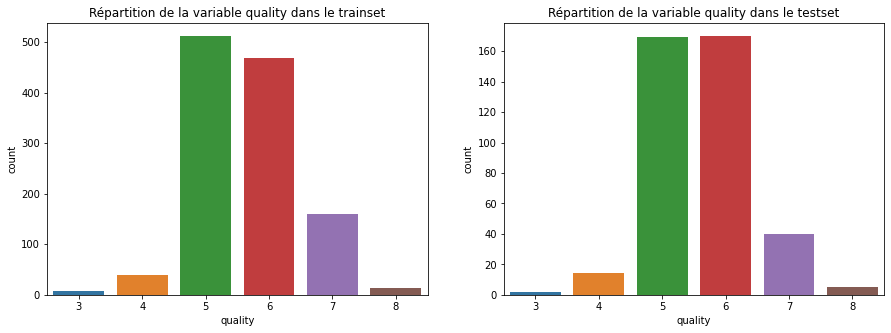

In [12]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=seed)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='quality', data=trainset)
plt.title('Répartition de la variable quality dans le trainset')
plt.subplot(1,2,2)
sns.countplot(x='quality', data=testset)
plt.title('Répartition de la variable quality dans le testset')

# Preprocessing + Feature selection

In [ ]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.countplot(x='quality', data=SMOTEd_trainset)
# plt.title('Répartition de la variable quality dans le trainset')
# plt.subplot(1,2,2)
# sns.countplot(x='quality', data=testset)
# plt.title('Répartition de la variable quality dans le testset');

In [24]:
from collections import Counter

def preprocessing(df, resampler=None):
    
    df_unique = df.drop_duplicates()
    
    X = df_unique.drop('quality', axis=1)
    y = df_unique.quality
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
    if resampler!=None:
        X_train,y_train = resampler.fit_resample(X_train,y_train)
    
    return X_train, y_train, X_test, y_test

Original dataset shape Counter({5: 432, 6: 408, 7: 115, 4: 44, 8: 14, 3: 6})


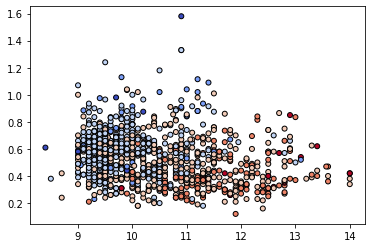

In [32]:
X_train, y_train, X_test, y_test = preprocessing(df, resampler=None)
print('Original dataset shape %s' % Counter(y_train))
plt.scatter(X_train['alcohol'],X_train['volatile acidity'], marker='o', c=y_train, s=25, edgecolor='k', cmap=plt.cm.coolwarm)

Resampled dataset shape Counter({5: 432, 6: 432, 7: 432, 4: 432, 3: 432, 8: 432})


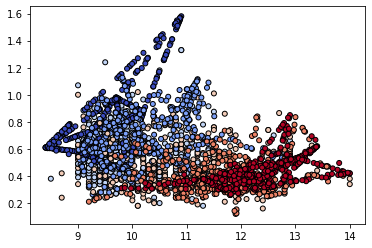

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=seed, k_neighbors=4)
X_train, y_train, X_test, y_test = preprocessing(df, resampler=smote)
print('Resampled dataset shape %s' % Counter(y_train))
plt.scatter(X_train['alcohol'],X_train['volatile acidity'], marker='o', c=y_train, s=25, edgecolor='k', cmap=plt.cm.coolwarm)

Resampled dataset shape Counter({3: 421, 8: 419, 7: 412, 4: 397, 5: 344, 6: 337})


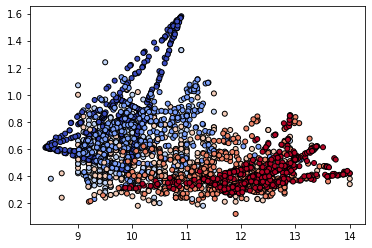

In [34]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=seed)
X_train, y_train, X_test, y_test = preprocessing(df, resampler=smt)
print('Resampled dataset shape %s' % Counter(y_train))
plt.scatter(X_train['alcohol'],X_train['volatile acidity'], marker='o', c=y_train, s=25, edgecolor='k', cmap=plt.cm.coolwarm)

In [11]:
X_train, y_train, X_test, y_test = X_smt, y_smt, testset.drop('quality', axis=1), testset.quality

In [24]:
X_train, y_train, X_test, y_test = X_smote, y_smote, testset.drop('quality', axis=1), testset.quality

In [26]:
X_train, y_train, X_test, y_test = X_train, y_train, testset.drop('quality', axis=1), testset.quality

# Procédure d'évaluation

In [12]:
from sklearn.model_selection import learning_curve

In [13]:
from sklearn.metrics import mean_squared_error

def evaluation_mse(model):

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model[-1].__class__.__name__ :<25} {round(mse,3)} MSE score.')
    
    fig, ax = plt.subplots(1, 3, figsize = (16,4))
    fig.subplots_adjust(top=0.85)
    
#     ax[0].set_title('Matrice de confusion')
#     cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", ax=ax[0])
#     ax[0].set_xlabel('Predicted label')
#     ax[0].set_ylabel('True label')
    
    ax[0].set_title('y_test vs y_pred')
    ax[0].scatter(x = y_test, y = y_pred)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    
    ax[1].set_title('Residual Plot of test samples')
    sns.distplot((y_test-y_pred), hist = False, ax = ax[1])
    ax[1].set_xlabel('y_pred')
    
    ax[2].set_title('Learning curve')
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv = 4,
                                               scoring = 'neg_mean_absolute_error',
                                               train_sizes = np.linspace(0.1, 1, 10))
    ax[2].plot(N, train_score.mean(axis=1), label='train score')
    ax[2].plot(N, val_score.mean(axis=1), label='validation score')
    
    plt.suptitle(model[-1].__class__.__name__, fontsize=14)
    plt.legend();

In [14]:
from sklearn.metrics import r2_score

# Modélisation

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [16]:
SVR = make_pipeline(StandardScaler(), SVR())
OLS = make_pipeline(StandardScaler(), LinearRegression())
PCR = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())
PLS = make_pipeline(StandardScaler(), PLSRegression(n_components=2))
KNN = make_pipeline(KNeighborsRegressor())
RandomForest = make_pipeline(RandomForestRegressor(random_state=0))
XGBoost = make_pipeline(StandardScaler(), XGBRegressor(verbosity=0, random_state=0))

In [17]:
dict_of_models = {'SVM': SVR,
                  'RandomForest': RandomForest,
                  'OLS':OLS,
                  'PCR':PCR,
                  #'PLS':PLS,
                  'KNN': KNN,
                  'RandomForest': RandomForest,
                  'XGBoost': XGBoost
                  }

SVR                       0.686 mean squared error score.
RandomForestRegressor     0.471 mean squared error score.
LinearRegression          0.865 mean squared error score.
LinearRegression          0.904 mean squared error score.
KNeighborsRegressor       1.209 mean squared error score.
XGBRegressor              0.464 mean squared error score.


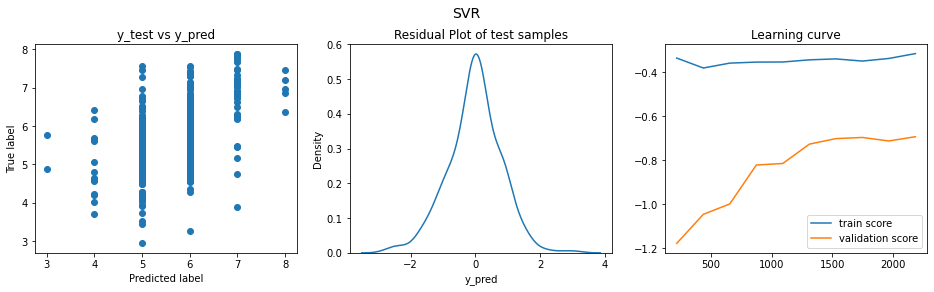

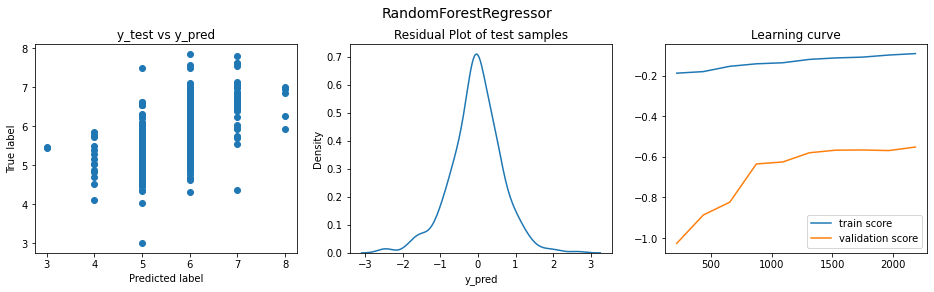

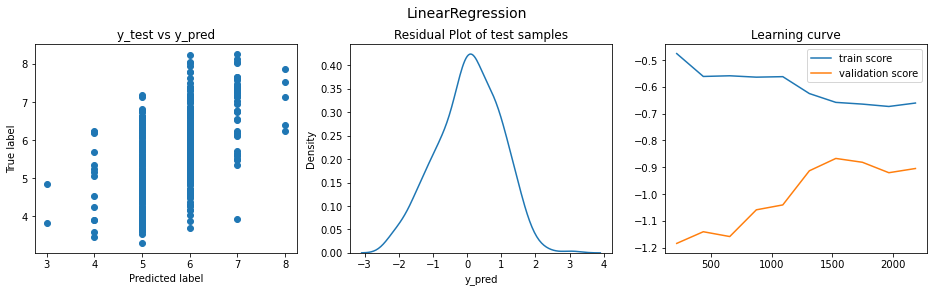

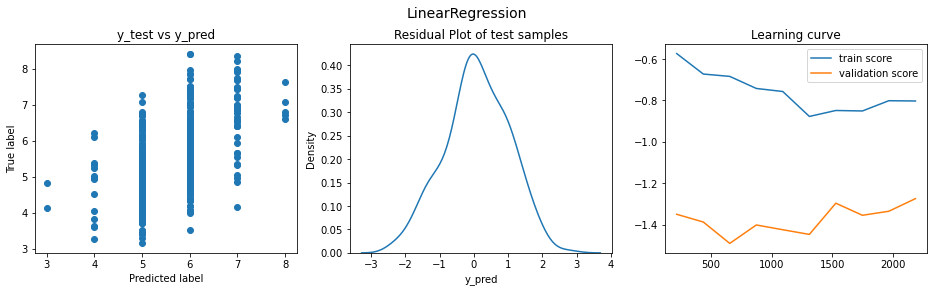

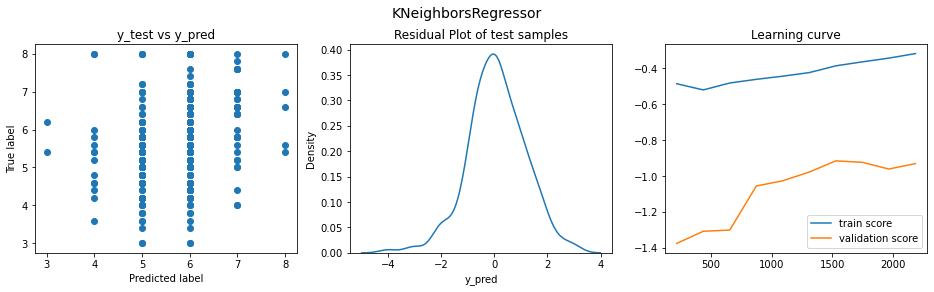

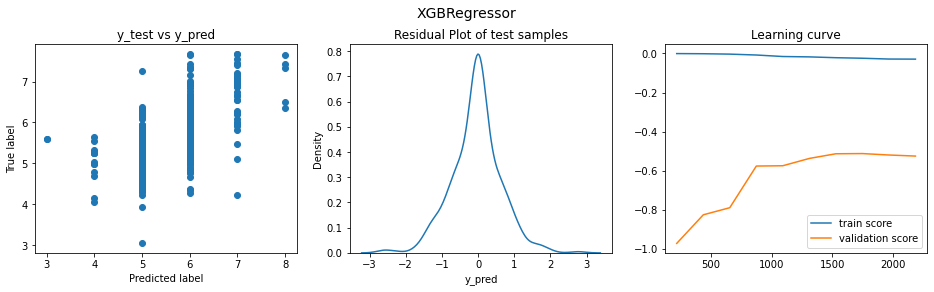

In [18]:
# smoteTomek
for model in dict_of_models.values():
    evaluation_mse(model)

In [19]:
y_train.value_counts()

3    507
8    504
7    497
4    493
5    460
6    453
Name: quality, dtype: int64

SVR                       0.681 mean squared error score.
RandomForestRegressor     0.464 mean squared error score.
LinearRegression          0.848 mean squared error score.
LinearRegression          0.894 mean squared error score.
KNeighborsRegressor       1.192 mean squared error score.
XGBRegressor              0.491 mean squared error score.


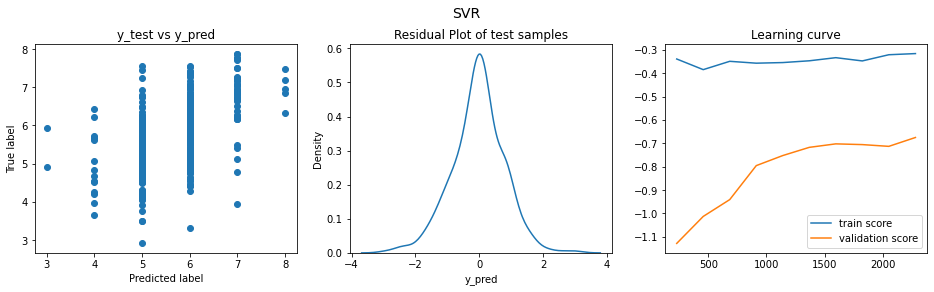

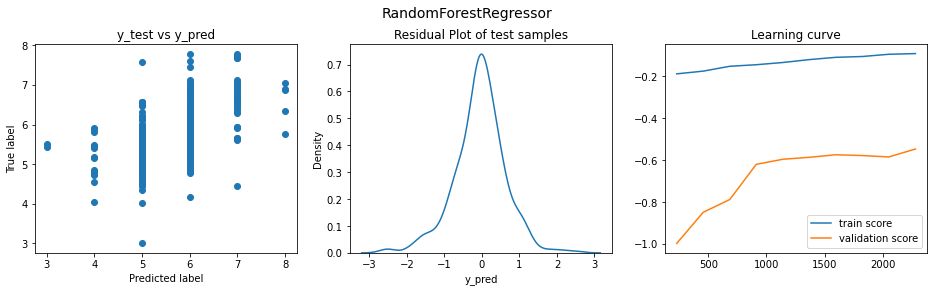

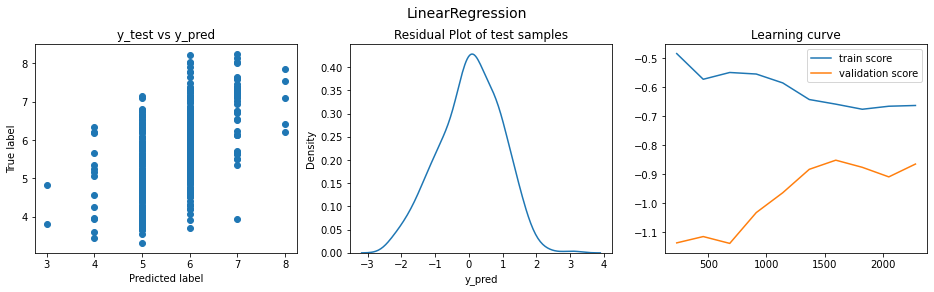

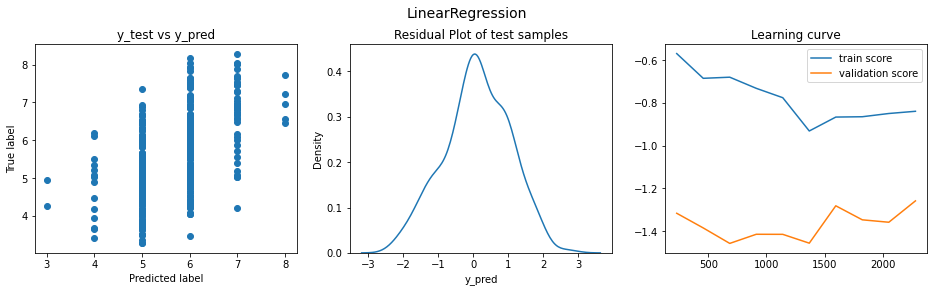

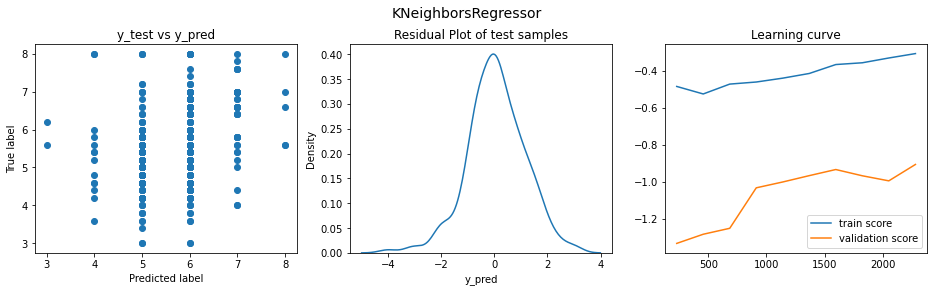

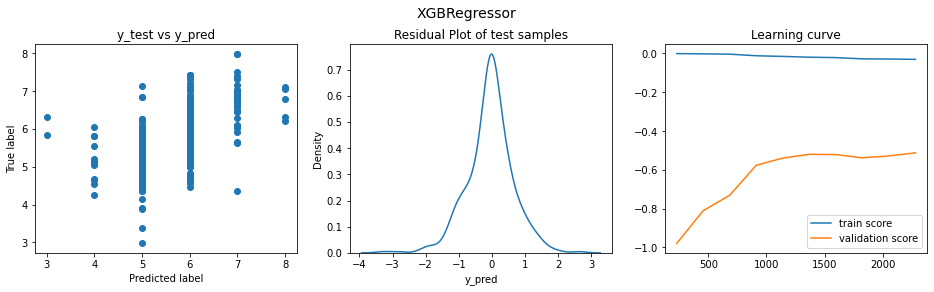

In [25]:
# smote
for name, model in dict_of_models.items():
    evaluation_mse(model)

SVR                       0.681 mean squared error score.
RandomForestRegressor     0.464 mean squared error score.
LinearRegression          0.848 mean squared error score.
LinearRegression          0.894 mean squared error score.
KNeighborsRegressor       1.192 mean squared error score.
XGBRegressor              0.491 mean squared error score.


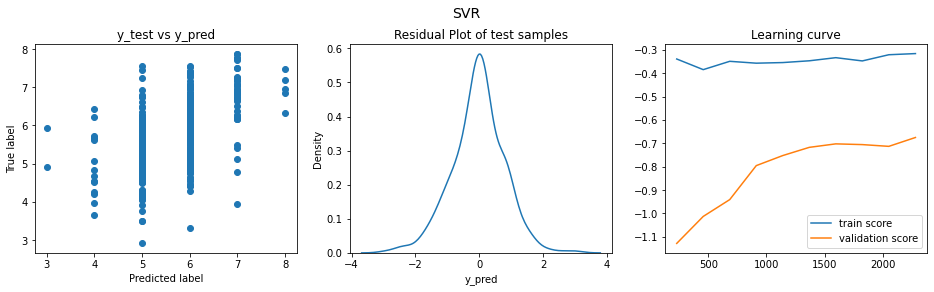

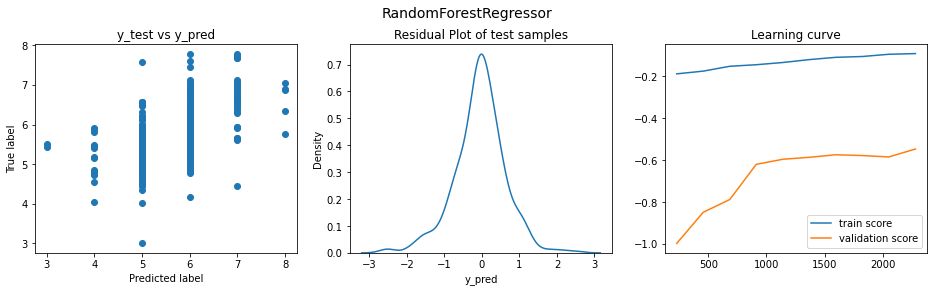

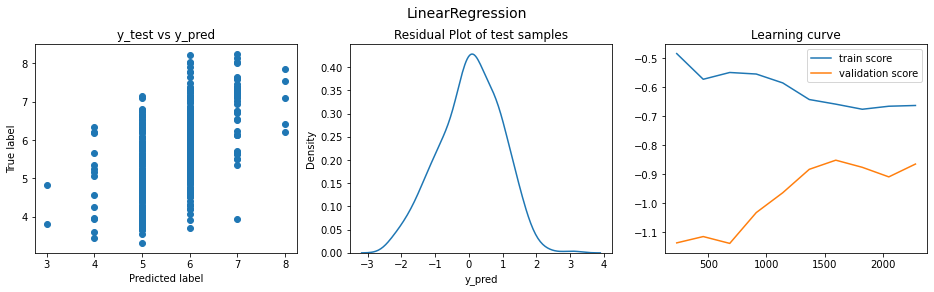

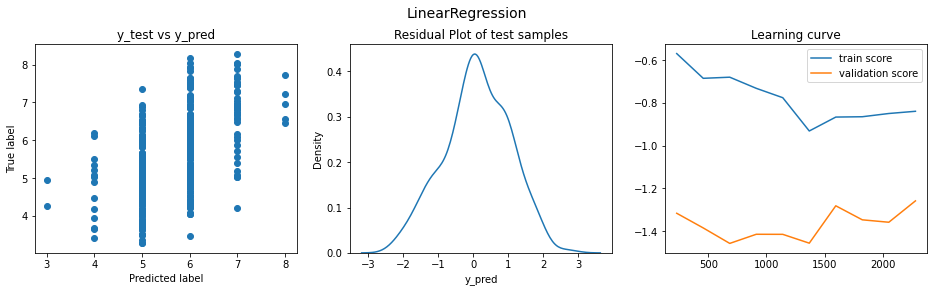

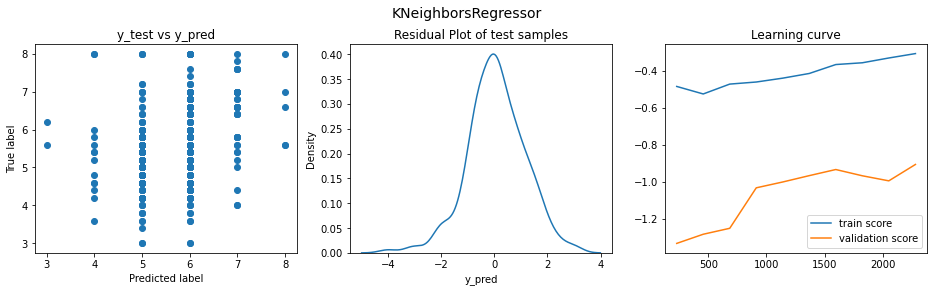

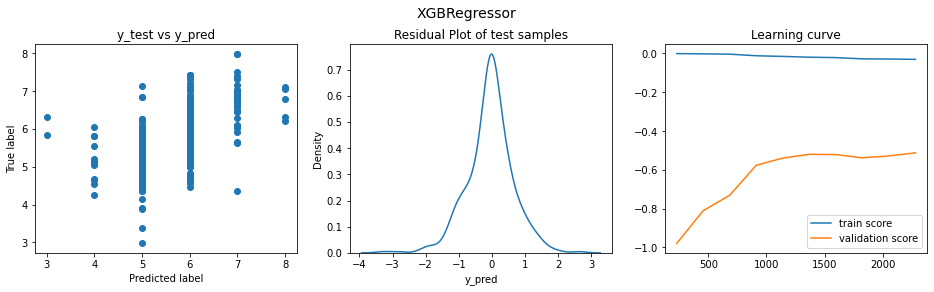

In [27]:
# without resample
for name, model in dict_of_models.items():
    evaluation_mse(model)

# Optimisation

# Bilan